# Forecasting Assignment - Coco-Cola Sales Problem
## -------------------------------------------------------------------------------------------------------------------------------

## Problem Statement : Forecast the Airlines data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

## 1. Import neessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset :

In [2]:
airlines_data = pd.read_excel('Airlines+Data.xlsx')
airlines_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## 3. Data Understanding :

In [3]:
airlines_data.shape

(96, 2)

In [4]:
airlines_data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
airlines_data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

## 4. Data Preparation :

In [6]:
from datetime import datetime as dt

In [7]:
airlines_data['month'] = airlines_data['Month'].dt.strftime("%B")
airlines_data

,Month,Passengers,month
0,1995-01-01,112,January
1,1995-02-01,118,February
2,1995-03-01,132,March
3,1995-04-01,129,April
4,1995-05-01,121,May
...,...,...,...
91,2002-08-01,405,August
92,2002-09-01,355,September
93,2002-10-01,306,October
94,2002-11-01,271,November


In [8]:
airlines_data['year'] = airlines_data['Month'].dt.strftime("%Y")
airlines_data

,Month,Passengers,month,year
0,1995-01-01,112,January,1995
1,1995-02-01,118,February,1995
2,1995-03-01,132,March,1995
3,1995-04-01,129,April,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,August,2002
92,2002-09-01,355,September,2002
93,2002-10-01,306,October,2002
94,2002-11-01,271,November,2002


In [9]:
airlines_pivot_data = pd.pivot_table(data= airlines_data,values='Passengers',index='year',columns='month',fill_value=0)
airlines_pivot_data

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


### 4. Visualisation :

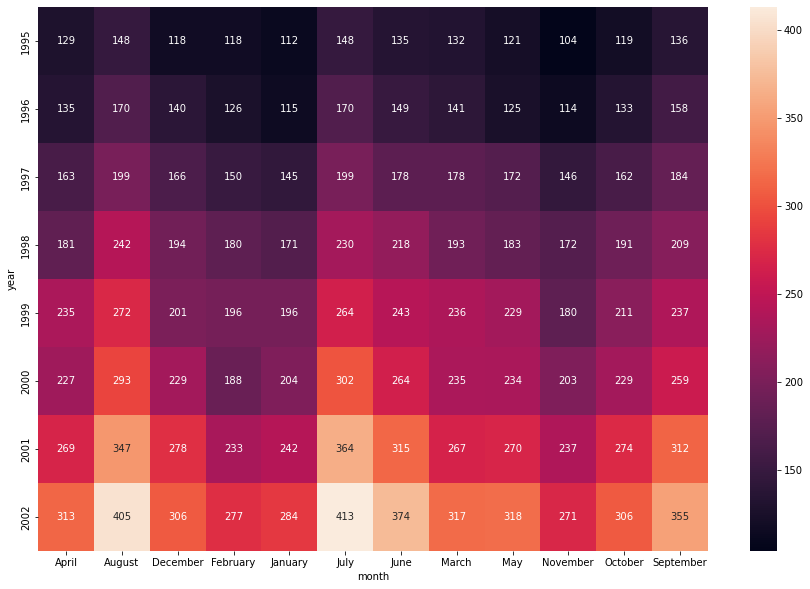

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data = airlines_pivot_data,annot=True,fmt='2g')
plt.show()

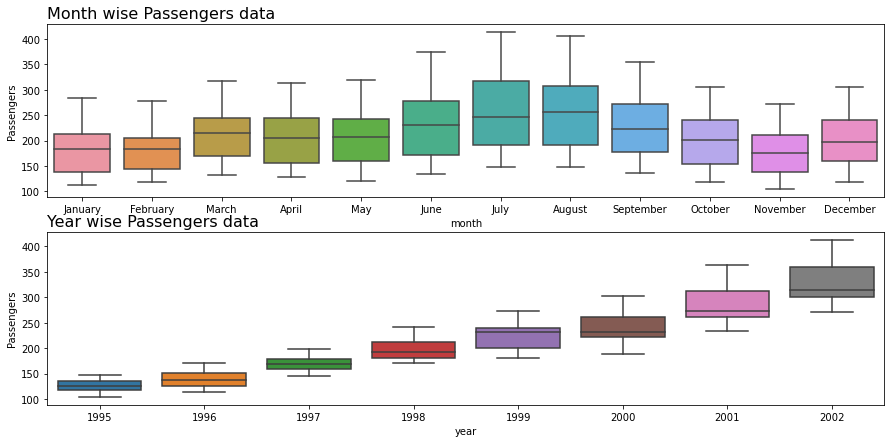

In [11]:
#Boxplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,2)
sns.boxplot(x='year',y='Passengers',data=airlines_data)
plt.title('Year wise Passengers data',loc='left',fontsize = 16)
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data = airlines_data)
plt.title('Month wise Passengers data',loc='left',fontsize = 16)
plt.show()

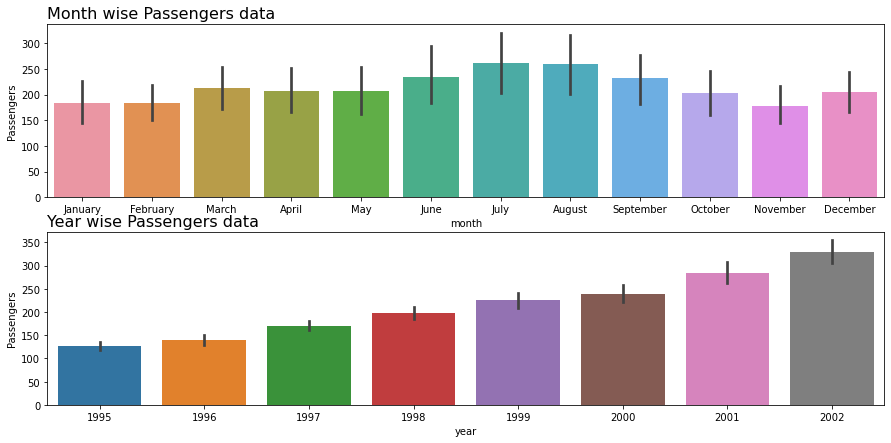

In [12]:
#Barplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,2)
sns.barplot(x='year',y='Passengers',data=airlines_data)
plt.title('Year wise Passengers data',loc='left',fontsize = 16)
plt.subplot(211)
sns.barplot(x='month',y='Passengers',data = airlines_data)
plt.title('Month wise Passengers data',loc='left',fontsize = 16)
plt.show()

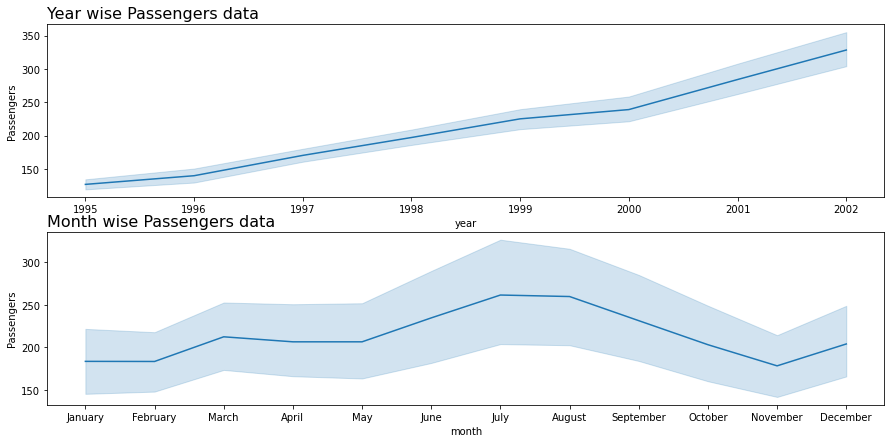

In [13]:
#Lineplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.lineplot(x='year',y='Passengers',data=airlines_data)
plt.title('Year wise Passengers data',loc='left',fontsize = 16)
plt.subplot(212)
sns.lineplot(x='month',y='Passengers',data = airlines_data)
plt.title('Month wise Passengers data',loc='left',fontsize = 16)
plt.show()

## 5. Creating dummies :

In [14]:
dummy_1 = pd.get_dummies(airlines_data['month'])
dummy_1

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
airlines_data_1 = airlines_data.copy()

### 6. Merging the dummy data set with airlines data:

In [16]:
airlines_data_1 = pd.concat((airlines_data_1,dummy_1),axis=1)
airlines_data_1

,Month,Passengers,month,year,April,August,December,February,January,July,June,March,May,November,October,September
0,1995-01-01,112,January,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,February,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,March,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,April,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,August,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,September,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,October,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,November,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
airlines_data_1['t'] = np.arange(1,97)
airlines_data_1['t_squared'] = airlines_data_1['t'] * airlines_data_1['t']
airlines_data_1['log_Passengers'] = np.log(airlines_data_1['Passengers'])
airlines_data_1

,Month,Passengers,month,year,April,August,December,February,January,July,June,March,May,November,October,September,t,t_squared,log_Passengers
0,1995-01-01,112,January,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,February,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,March,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,April,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,August,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,September,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,October,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,November,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


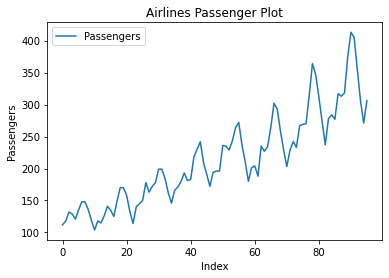

In [18]:
airlines_data_1['Passengers'].plot()
plt.title('Airlines Passenger Plot')
plt.xlabel('Index')
plt.ylabel('Passengers')
plt.legend()
plt.show()

## 7. Splitting the data :

In [19]:
train_data = airlines_data_1.head(70)
test_data = airlines_data_1.tail(26)

In [20]:
train_data

,Month,Passengers,month,year,April,August,December,February,January,July,June,March,May,November,October,September,t,t_squared,log_Passengers
0,1995-01-01,112,January,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,February,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,March,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,April,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2000-06-01,264,June,2000,0,0,0,0,0,0,1,0,0,0,0,0,66,4356,5.575949
66,2000-07-01,302,July,2000,0,0,0,0,0,1,0,0,0,0,0,0,67,4489,5.710427
67,2000-08-01,293,August,2000,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,2000-09-01,259,September,2000,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828


In [21]:
test_data

,Month,Passengers,month,year,April,August,December,February,January,July,June,March,May,November,October,September,t,t_squared,log_Passengers
70,2000-11-01,203,November,2000,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206
71,2000-12-01,229,December,2000,0,0,1,0,0,0,0,0,0,0,0,0,72,5184,5.433722
72,2001-01-01,242,January,2001,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,2001-02-01,233,February,2001,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,2001-03-01,267,March,2001,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,2001-04-01,269,April,2001,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,2001-05-01,270,May,2001,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,2001-06-01,315,June,2001,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,2001-07-01,364,July,2001,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,2001-08-01,347,August,2001,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325


## 8. Model Based Forecasting :

In [22]:
import statsmodels.formula.api as smf

### 8.1 Linear Model :

In [23]:
#training
linear_model = smf.ols('Passengers~t',data= train_data).fit()

#testing
pred_linear = pd.Series(linear_model.predict(test_data['t']))

#evaluation
rmse_linear = np.sqrt((np.mean(np.array(test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear

17.6818799082118

### 8.2 Exponential Model :

In [24]:
#training
exponential_model = smf.ols('log_Passengers~t',data= train_data).fit()

#testing
pred_exponential = pd.Series(exponential_model.predict(test_data['t']))

#evaluation
rmse_exponential = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_exponential)))**2))
rmse_exponential

43.47847070446902

### 8.3 Quadratic Model :

In [25]:
#training
quadratic_model = smf.ols('Passengers~t+t_squared',data= train_data).fit()

#testing
pred_quadratic = pd.Series(quadratic_model.predict(test_data[["t","t_squared"]]))

#evaluation
rmse_quadratic = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_quadratic))**2))
rmse_quadratic

43.898144967424926

### 8.4 Additive Seasonality Model :

In [26]:
#training
additive_seasonality_model = smf.ols('Passengers~January+February+March+April+May+June+July+August+September+October+November+December',data= train_data).fit()

#testing
pred_additive_seasonality= pd.Series(additive_seasonality_model.predict(test_data[['January','February','March','April','May','June','July','August','September','October','November','December']]))

#evaluation
rmse_additive_seasonality = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_additive_seasonality))**2))
rmse_additive_seasonality

124.9756995182882

### 8.5 Additive Seasonality With Quadratic Trend Model :

In [27]:
#training
additive_seasonality_quadratic_model = smf.ols('Passengers~t+t_squared+January+February+March+April+May+June+July+August+September+October+November+December',data= train_data).fit()

#testing
pred_additive_seasonality_quadratic= pd.Series(additive_seasonality_quadratic_model.predict(test_data[['t','t_squared','January','February','March','April','May','June','July','August','September','October','November','December']]))

#evaluation
rmse_additive_seasonality_quadratic = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_additive_seasonality_quadratic))**2))
rmse_additive_seasonality_quadratic

30.393042895920612

### 8.6 Multipicative Seasonality Model :

In [28]:
#training
multipicative_seasonality_model = smf.ols('log_Passengers~January+February+March+April+May+June+July+August+September+October+November+December',data= train_data).fit()

#testing
pred_multipicative_seasonality= pd.Series(multipicative_seasonality_model.predict(test_data[['January','February','March','April','May','June','July','August','September','October','November','December']]))

#evaluation
rmse_multipicative_seasonality = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_multipicative_seasonality)))**2))
rmse_multipicative_seasonality

129.6291447652629

###  Results of Models :

In [29]:
#Compare the results
data ={'MODEL':pd.Series(["LINEAR_MODEL","EXPONENTIAL_MODEL","QUADRATIC_MODEL","ADDITIVE_SEASONALITY_MODEL","ADDITIVE_SEASONALITY_WITH_QUADRATIC_TREND_MODEL","MULTIPICATIVE_SEASONALITY_MODEL"]),
      'RMSE_VALUES':pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive_seasonality,rmse_additive_seasonality_quadratic,rmse_multipicative_seasonality])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_VALUES
0,LINEAR_MODEL,17.681880
1,EXPONENTIAL_MODEL,43.478471
2,QUADRATIC_MODEL,43.898145
3,ADDITIVE_SEASONALITY_MODEL,124.975700
4,ADDITIVE_SEASONALITY_WITH_QUADRATIC_TREND_MODEL,30.393043
5,MULTIPICATIVE_SEASONALITY_MODEL,129.629145


### Best Model is the Linear Model.

## 9. Final Model Prediction :

### A new predicted data set is created using excel for the next upcoming 2 years (i.e 2003 January to 2004 December)

In [30]:
predict_data = pd.read_csv('Airlines_predict.csv',sep=',')
predict_data

,Month,January,February,March,April,May,June,July,August,September,October,November,December,t,t_squared
0,2003-01-01,1,0,0,0,0,0,0,0,0,0,0,0,97,9409
1,2003-02-01,0,1,0,0,0,0,0,0,0,0,0,0,98,9604
2,2003-03-01,0,0,1,0,0,0,0,0,0,0,0,0,99,9801
3,2003-04-01,0,0,0,1,0,0,0,0,0,0,0,0,100,10000
4,2003-05-01,0,0,0,0,1,0,0,0,0,0,0,0,101,10201
5,2003-06-01,0,0,0,0,0,1,0,0,0,0,0,0,102,10404
6,2003-07-01,0,0,0,0,0,0,1,0,0,0,0,0,103,10609
7,2003-08-01,0,0,0,0,0,0,0,1,0,0,0,0,104,10816
8,2003-09-01,0,0,0,0,0,0,0,0,1,0,0,0,105,11025
9,2003-10-01,0,0,0,0,0,0,0,0,0,1,0,0,106,11236


In [31]:
model_full = smf.ols('Passengers~t+t_squared+January+February+March+April+May+June+July+August+September+October+November+December',data= airlines_data_1).fit()
model_full

In [32]:
predict_new = pd.Series(model_full.predict(predict_data))
predict_new

0     328.328687
1     329.438178
2     359.547668
3     354.907159
4     356.141650
5     385.376141
6     413.360631
7     412.845122
8     385.829613
9     358.939103
10    335.423594
11    362.283085
12    371.458313
13    372.842135
14    403.225957
15    398.859779
16    400.368601
17    429.877423
18    458.136245
19    457.895067
20    431.153889
21    404.537711
22    381.296533
23    408.430355
dtype: float64

In [33]:
predict_data['forecasted_Passengers'] =pd.Series(predict_new)
predict_data

,Month,January,February,March,April,May,June,July,August,September,October,November,December,t,t_squared,forecasted_Passengers
0,2003-01-01,1,0,0,0,0,0,0,0,0,0,0,0,97,9409,328.328687
1,2003-02-01,0,1,0,0,0,0,0,0,0,0,0,0,98,9604,329.438178
2,2003-03-01,0,0,1,0,0,0,0,0,0,0,0,0,99,9801,359.547668
3,2003-04-01,0,0,0,1,0,0,0,0,0,0,0,0,100,10000,354.907159
4,2003-05-01,0,0,0,0,1,0,0,0,0,0,0,0,101,10201,356.141650
5,2003-06-01,0,0,0,0,0,1,0,0,0,0,0,0,102,10404,385.376141
6,2003-07-01,0,0,0,0,0,0,1,0,0,0,0,0,103,10609,413.360631
7,2003-08-01,0,0,0,0,0,0,0,1,0,0,0,0,104,10816,412.845122
8,2003-09-01,0,0,0,0,0,0,0,0,1,0,0,0,105,11025,385.829613
9,2003-10-01,0,0,0,0,0,0,0,0,0,1,0,0,106,11236,358.939103


In [34]:
new_data = pd.concat([airlines_data_1,predict_data])
new_data

,Month,Passengers,month,year,April,August,December,February,January,July,June,March,May,November,October,September,t,t_squared,log_Passengers,forecasted_Passengers
0,1995-01-01 00:00:00,112.0,January,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,NaN
1,1995-02-01 00:00:00,118.0,February,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,NaN
2,1995-03-01 00:00:00,132.0,March,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,NaN
3,1995-04-01 00:00:00,129.0,April,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,NaN
4,1995-05-01 00:00:00,121.0,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2004-08-01,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,116,13456,NaN,457.895067
20,2004-09-01,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,1,117,13689,NaN,431.153889
21,2004-10-01,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,118,13924,NaN,404.537711
22,2004-11-01,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,119,14161,NaN,381.296533


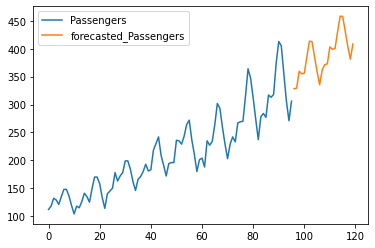

In [35]:
new_data[['Passengers','forecasted_Passengers']].reset_index(drop=True).plot()
plt.show()

## ----------------------------------------------------------------------------------------------------------------------------

# 10. Data Driven Model :

In [36]:
#Import libraries

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [37]:
airlines_data_1.head()

,Month,Passengers,month,year,April,August,December,February,January,July,June,March,May,November,October,September,t,t_squared,log_Passengers
0,1995-01-01,112,January,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,February,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,March,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,April,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [38]:
train_data

,Month,Passengers,month,year,April,August,December,February,January,July,June,March,May,November,October,September,t,t_squared,log_Passengers
0,1995-01-01,112,January,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,February,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,March,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,April,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2000-06-01,264,June,2000,0,0,0,0,0,0,1,0,0,0,0,0,66,4356,5.575949
66,2000-07-01,302,July,2000,0,0,0,0,0,1,0,0,0,0,0,0,67,4489,5.710427
67,2000-08-01,293,August,2000,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,2000-09-01,259,September,2000,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828


In [39]:
test_data

,Month,Passengers,month,year,April,August,December,February,January,July,June,March,May,November,October,September,t,t_squared,log_Passengers
70,2000-11-01,203,November,2000,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206
71,2000-12-01,229,December,2000,0,0,1,0,0,0,0,0,0,0,0,0,72,5184,5.433722
72,2001-01-01,242,January,2001,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,2001-02-01,233,February,2001,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,2001-03-01,267,March,2001,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,2001-04-01,269,April,2001,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,2001-05-01,270,May,2001,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,2001-06-01,315,June,2001,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,2001-07-01,364,July,2001,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,2001-08-01,347,August,2001,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325


### Visualizations :

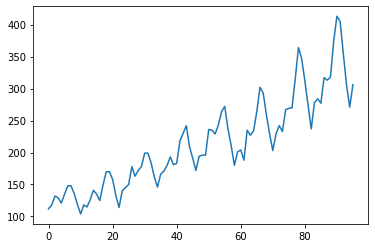

In [40]:
airlines_data_1.Passengers.plot()
plt.show()

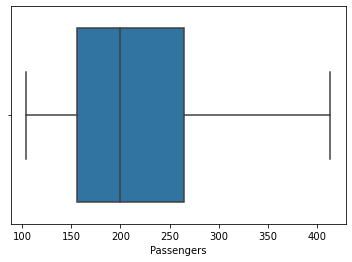

In [41]:
sns.boxplot(airlines_data_1['Passengers'])
plt.show()

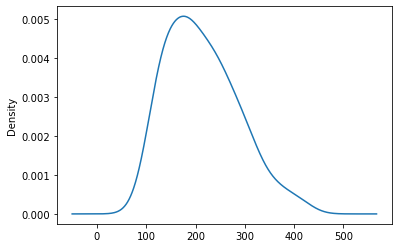

In [42]:
airlines_data_1['Passengers'].plot(kind ='kde')
plt.show()

In [43]:
from pandas.plotting import lag_plot

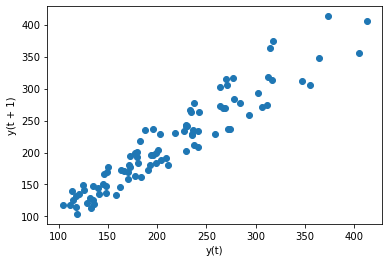

In [44]:
lag_plot(airlines_data_1['Passengers'])
plt.show()

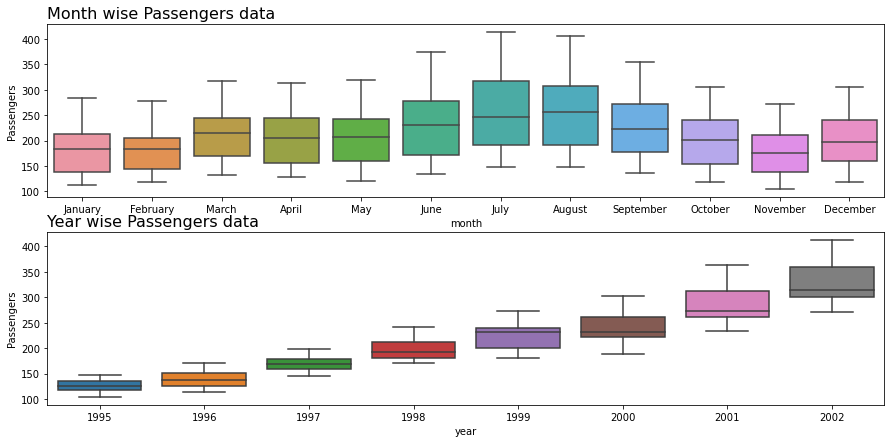

In [45]:
#Boxplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,2)
sns.boxplot(x='year',y='Passengers',data=airlines_data)
plt.title('Year wise Passengers data',loc='left',fontsize = 16)
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data = airlines_data)
plt.title('Month wise Passengers data',loc='left',fontsize = 16)
plt.show()

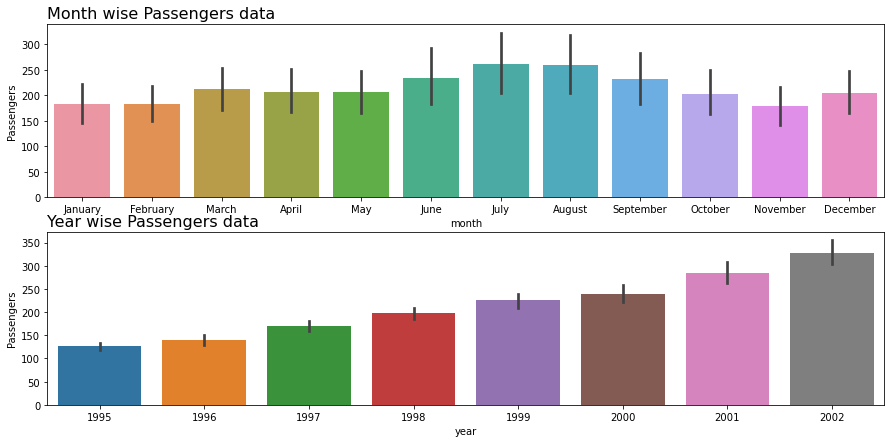

In [46]:
#Barplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,2)
sns.barplot(x='year',y='Passengers',data=airlines_data)
plt.title('Year wise Passengers data',loc='left',fontsize = 16)
plt.subplot(211)
sns.barplot(x='month',y='Passengers',data = airlines_data)
plt.title('Month wise Passengers data',loc='left',fontsize = 16)
plt.show()

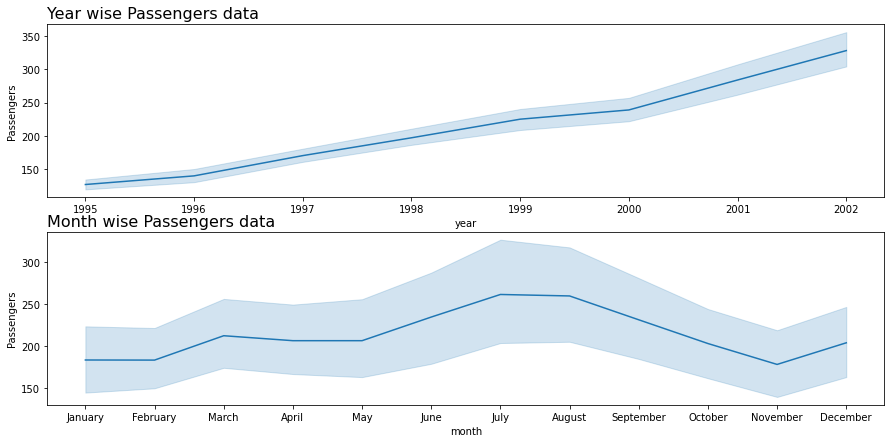

In [47]:
#Lineplot for the data
plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.lineplot(x='year',y='Passengers',data=airlines_data)
plt.title('Year wise Passengers data',loc='left',fontsize = 16)
plt.subplot(212)
sns.lineplot(x='month',y='Passengers',data = airlines_data)
plt.title('Month wise Passengers data',loc='left',fontsize = 16)
plt.show()

### 10.1 Moving Average :

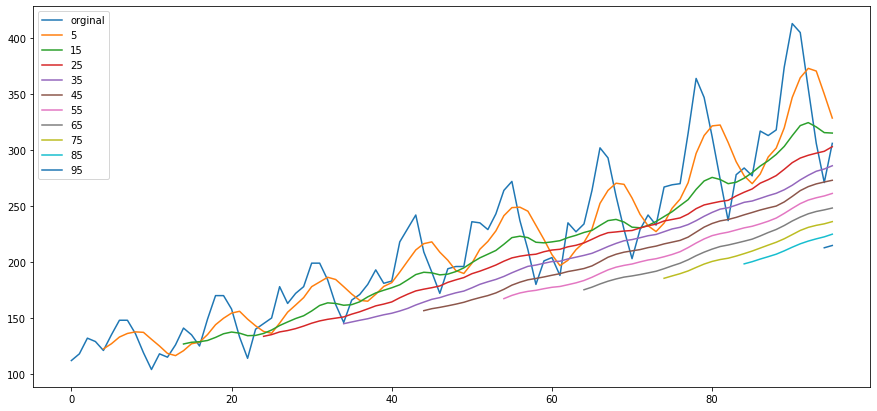

In [48]:
plt.figure(figsize=(15,7))
airlines_data_1.Passengers.plot(label="orginal")
for i in range(5,100,10):
    airlines_data_1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

### 10.2 Time Series Decomposition Plot :

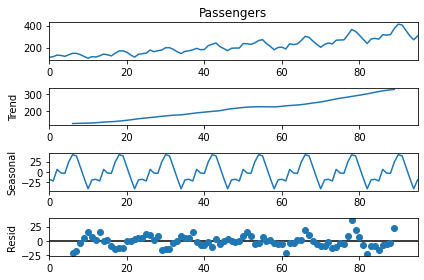

In [49]:
decompose_ts_add = seasonal_decompose(airlines_data_1.Passengers,model='additive',period=12,)
decompose_ts_add.plot()
plt.show()

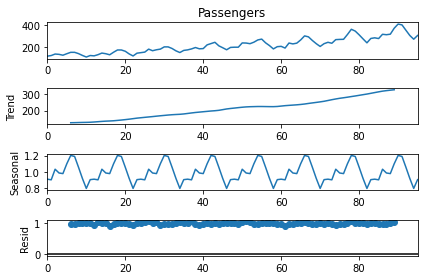

In [50]:
decompose_ts_mul = seasonal_decompose(airlines_data_1.Passengers,model='multiplicative',period=12,)
decompose_ts_mul.plot()
plt.show()

### 10.3 ACF and PACF Plots :

In [51]:
import statsmodels.graphics.tsaplots as tsa_plots

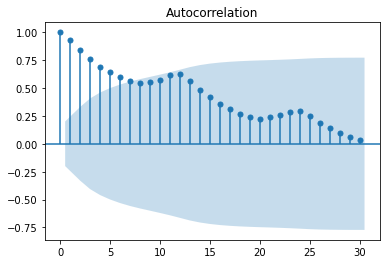

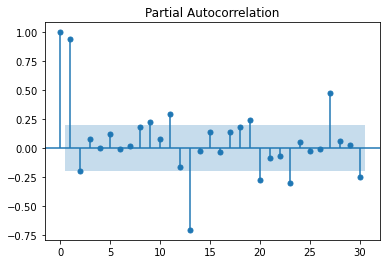

In [52]:
tsa_plots.plot_acf(airlines_data_1.Passengers,lags=30)
tsa_plots.plot_pacf(airlines_data_1.Passengers,lags=30)
plt.show()

## Evaluating Metric MAPE :

In [53]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### 10.4 Simple Exponential Smoothing Method :

In [54]:
ses_model = SimpleExpSmoothing(train_data["Passengers"]).fit(smoothing_level=0.2)
predict_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(predict_ses,test_data.Passengers) 

17.6627001752825

### 10.5 Holt Method :

In [55]:
hw_model = Holt(train_data['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hw,test_data.Passengers) 

34.72630547558442

### 10.6 Holts winter exponential smoothing with additive seasonality and additive trend :

In [56]:
hwe_model_add_add = ExponentialSmoothing(train_data['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_add_add,test_data.Passengers) 

10.83616873987438

### 10.7 Holts winter exponential smoothing with additive seasonality and multipicative trend :

In [57]:
hwe_model_add_mul = ExponentialSmoothing(train_data['Passengers'],seasonal="add",trend="mul",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_mul = hwe_model_add_mul.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_add_mul,test_data.Passengers)

9.796950293605596

### 10.8 Holts winter exponential smoothing with multipicative seasonality and additive trend :

In [58]:
hwe_model_mul_add = ExponentialSmoothing(train_data['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_mul_add,test_data.Passengers)

9.110124759050494

### 10.9 Holts winter exponential smoothing with multipicative seasonality and multipicative trend 

In [59]:
hwe_model_mul_mul = ExponentialSmoothing(train_data['Passengers'],seasonal="mul",trend="mul",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_mul_mul,test_data.Passengers)

5.591944019697836

### Prediction Model Visualisation:

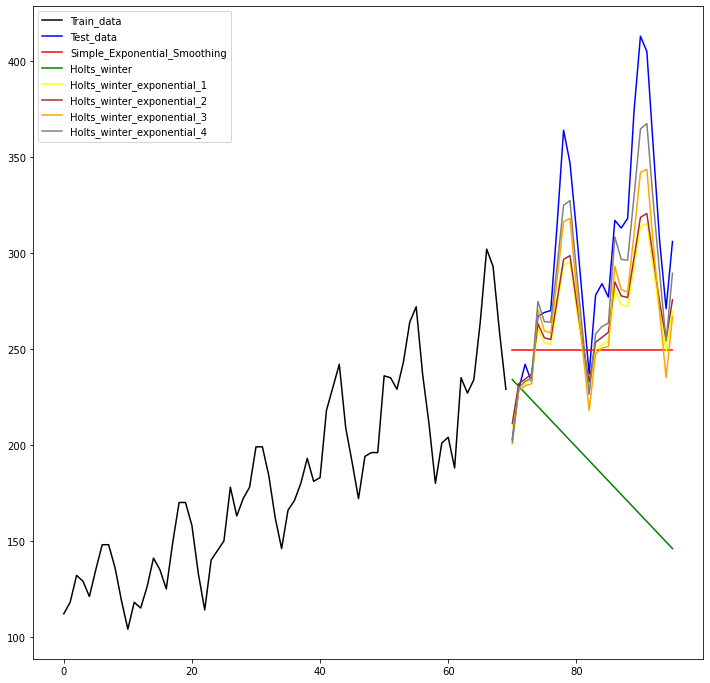

In [60]:
plt.figure(figsize=(12,12))
plt.plot(train_data.index,train_data['Passengers'],label='Train_data',color='black')
plt.plot(test_data.index,test_data['Passengers'],label='Test_data',color='blue')
plt.plot(predict_ses.index,predict_ses,label='Simple_Exponential_Smoothing',color='red')
plt.plot(pred_hw.index,pred_hw,label='Holts_winter',color='green')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label ='Holts_winter_exponential_1',color='yellow')
plt.plot(pred_hwe_add_mul.index,pred_hwe_add_mul,label ='Holts_winter_exponential_2',color='brown')
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label ='Holts_winter_exponential_3',color='orange')
plt.plot(pred_hwe_mul_mul.index,pred_hwe_mul_mul,label ='Holts_winter_exponential_4',color='gray')
plt.legend()
plt.show()

## Results of the Data driven models :

In [61]:
#Compare the results
data_driven_model_data ={'MODEL':pd.Series(["SIMPLE_EXPONENTIAL_SMOOTHING_METHOD","HOLT_METHOD",
                          "HOLTS WINTER EXPONENTIAL SMOOTHING WITH ADDITIVE SEASONALITY AND ADDITIVE TREND",
                          "HOLTS WINTER EXPONENTIAL SMOOTHING WITH ADDITIVE SEASONALITY AND MULTIPICATIVE TREND",
                          "HOLTS WINTER EXPONENTIAL SMOOTHING WITH MULTIPICATIVE SEASONALITY AND ADDITIVE TREND",
                          "HOLTS WINTER EXPONENTIAL SMOOTHING WITH MULTIPICATIVE SEASONALITY AND MULTIPICATIVE TREND"]),
      'MAPE_VALUES':pd.Series([round(MAPE(predict_ses,test_data.Passengers),4),round(MAPE(pred_hw,test_data.Passengers),4),
                              round(MAPE(pred_hwe_add_add,test_data.Passengers),4),round(MAPE(pred_hwe_add_mul,test_data.Passengers),4),
                              round(MAPE(pred_hwe_mul_add,test_data.Passengers),4),round(MAPE(pred_hwe_mul_mul,test_data.Passengers),4)])}
table_MAPE = pd.DataFrame(data_driven_model_data)
table_MAPE

,MODEL,MAPE_VALUES
0,SIMPLE_EXPONENTIAL_SMOOTHING_METHOD,17.6627
1,HOLT_METHOD,34.7263
2,HOLTS WINTER EXPONENTIAL SMOOTHING WITH ADDITI...,10.8362
3,HOLTS WINTER EXPONENTIAL SMOOTHING WITH ADDITI...,9.7970
4,HOLTS WINTER EXPONENTIAL SMOOTHING WITH MULTIP...,9.1101
5,HOLTS WINTER EXPONENTIAL SMOOTHING WITH MULTIP...,5.5919


### Forecasting using the best nodel :

#### The best model is the Holts winter Exponential Smoothing With Multipicative Seasonality and Multipicative Trend .

In [62]:
hwe_full_model_mul_mul = ExponentialSmoothing(airlines_data_1["Passengers"],seasonal="mul",trend="mul",seasonal_periods=12).fit()
hwe_full_model_mul_mul

In [63]:
#prediction for next 13 quarters 
hwe_full_model_mul_mul.forecast(24)

96     315.019648
97     311.707843
98     361.242490
99     352.909910
100    354.365082
101    403.881844
102    450.860072
103    445.622010
104    395.602957
105    347.199486
106    304.935335
107    348.176077
108    357.242046
109    353.486357
110    409.660182
111    400.210778
112    401.860988
113    458.014532
114    511.289299
115    505.349174
116    448.626017
117    393.734980
118    345.806123
119    394.842465
dtype: float64

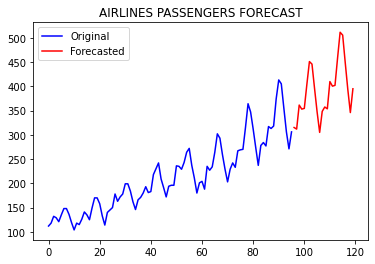

In [64]:
plt.plot(airlines_data_1.index,airlines_data_1['Passengers'],label='Original',color='blue')
plt.plot(hwe_full_model_mul_mul.forecast(24),label='Forecasted',color='red')
plt.title('AIRLINES PASSENGERS FORECAST')
plt.legend()
plt.show()

## -----------------------------------------------------------------------------------------------------------------------

# 11. ARIMA MODEL:

In [65]:
airlines_data_2 = airlines_data.copy()
airlines_data_2

,Month,Passengers,month,year
0,1995-01-01,112,January,1995
1,1995-02-01,118,February,1995
2,1995-03-01,132,March,1995
3,1995-04-01,129,April,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,August,2002
92,2002-09-01,355,September,2002
93,2002-10-01,306,October,2002
94,2002-11-01,271,November,2002


In [66]:
airlines_data_2.drop(labels=['month','year'],axis=1,inplace=True)
airlines_data_2

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [67]:
airlines_data_2.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [68]:
airlines_data_2.isna().sum()

Month         0
Passengers    0
dtype: int64

### Visualisation:

<AxesSubplot:>

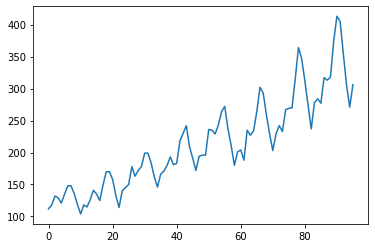

In [69]:
#Data is non stattionary and seasonal
airlines_data_2['Passengers'].plot()

In [70]:
# Testing seasionality by using Dicky fuller test
from statsmodels.tsa.stattools import adfuller

In [71]:
test_result=adfuller(airlines_data_2['Passengers'])
test_result

(1.340247959646704,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [72]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.10:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ") 

In [73]:
adfuller_test(airlines_data_2['Passengers'])

ADF Test Statistic : 1.340247959646704
p-value : 0.9968250481137263
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing :

In [74]:
airlines_data_2['Passengers_First_Difference'] = airlines_data_2['Passengers'] - airlines_data_2['Passengers'].shift(1)
airlines_data_2.head()

,Month,Passengers,Passengers_First_Difference
0,1995-01-01,112,NaN
1,1995-02-01,118,6.0
2,1995-03-01,132,14.0
3,1995-04-01,129,-3.0
4,1995-05-01,121,-8.0


In [75]:
airlines_data_2['Seasonal_First_Difference'] = airlines_data_2['Passengers'] - airlines_data_2['Passengers'].shift(12)
airlines_data_2.head(20)

,Month,Passengers,Passengers_First_Difference,Seasonal_First_Difference
0,1995-01-01,112,NaN,NaN
1,1995-02-01,118,6.0,NaN
2,1995-03-01,132,14.0,NaN
3,1995-04-01,129,-3.0,NaN
4,1995-05-01,121,-8.0,NaN
5,1995-06-01,135,14.0,NaN
6,1995-07-01,148,13.0,NaN
7,1995-08-01,148,0.0,NaN
8,1995-09-01,136,-12.0,NaN
9,1995-10-01,119,-17.0,NaN


In [76]:
airlines_data_2.dropna(inplace=True)

In [77]:
adfuller_test(airlines_data_2['Seasonal_First_Difference'].dropna())

ADF Test Statistic : -2.6900043838623158
p-value : 0.07578397625851772
#Lags Used : 1
Number of Observations Used : 82
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

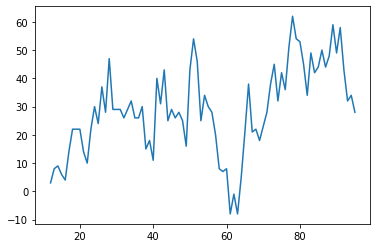

In [78]:
airlines_data_2['Seasonal_First_Difference'].plot()

### ACF and PCF plot

In [79]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

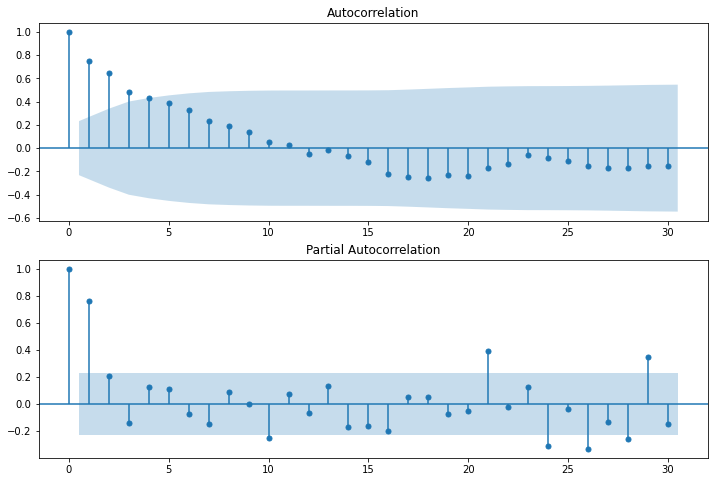

In [80]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(airlines_data_2['Seasonal_First_Difference'].iloc[13:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(airlines_data_2['Seasonal_First_Difference'].iloc[13:],lags=30,ax=ax2)

In [81]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
model=ARIMA(airlines_data_2['Passengers'],order=(1,1,1))
model_fit=model.fit()

In [84]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -377.138
Method:                       css-mle   S.D. of innovations             22.366
Date:                Tue, 21 Dec 2021   AIC                            762.275
Time:                        03:58:19   BIC                            771.951
Sample:                             1   HQIC                           766.162
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4537      2.948      0.832      0.405      -3.325       8.233
ar.L1.D.Passengers    -0.6635      0.087     -7.602      0.000      -0.835      -0.492
ma.L1.D.Passengers     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5072           +0.0000j            1.5072            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

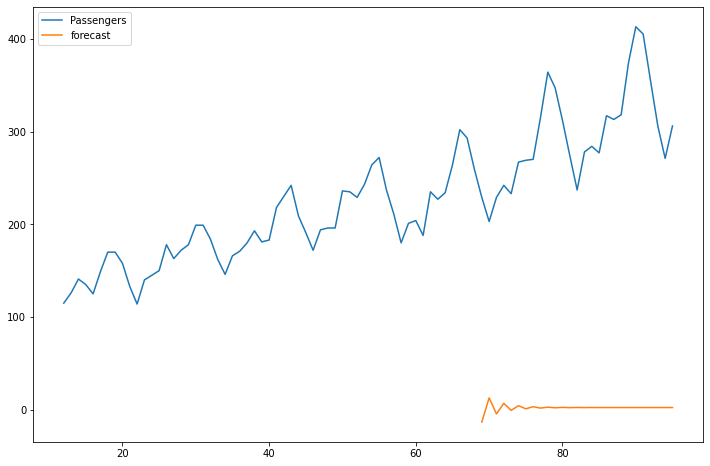

In [85]:
airlines_data_2['forecast']=model_fit.predict(start=70,end=96,dynamic=True)
airlines_data_2[['Passengers','forecast']].plot(figsize=(12,8))

In [86]:
airlines_data_2['forecast']

12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
        ...   
91    2.451780
92    2.454904
93    2.452832
94    2.454207
95    2.453294
Name: forecast, Length: 84, dtype: float64

##### Used for non-seasional data, but here data are seasional hence accuracy is low for ARIMA model

##### For seasonal model, SARIMA model is used

##  -------------------------------------------------------------------------------------------------------------------------

# 12. SARIMA MODEL :

In [87]:
import statsmodels.api as sm

In [88]:
model=sm.tsa.statespace.SARIMAX(airlines_data_2['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [89]:
airlines_data_2.drop('forecast',axis=1,inplace=True)

<AxesSubplot:>

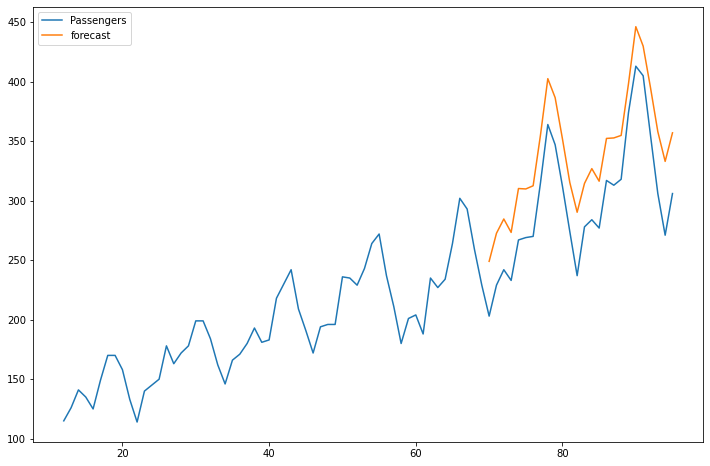

In [90]:
airlines_data_2['forecast']=results.predict(start=70,end=96,dynamic=True)
airlines_data_2[['Passengers','forecast']].plot(figsize=(12,8))

In [91]:
airlines_data_2.drop(labels='forecast',axis=1,inplace=True)

In [92]:
airlines_data_2

,Month,Passengers,Passengers_First_Difference,Seasonal_First_Difference
12,1996-01-01,115,-3.0,3.0
13,1996-02-01,126,11.0,8.0
14,1996-03-01,141,15.0,9.0
15,1996-04-01,135,-6.0,6.0
16,1996-05-01,125,-10.0,4.0
...,...,...,...,...
91,2002-08-01,405,-8.0,58.0
92,2002-09-01,355,-50.0,43.0
93,2002-10-01,306,-49.0,32.0
94,2002-11-01,271,-35.0,34.0


In [93]:
airlines_data_2.set_index('Month',inplace=True)

In [94]:
from pandas.tseries.offsets import DateOffset
future_dates=[airlines_data_2.index[-1]+ DateOffset(months=x)for x in range(0,25)] #predicting for next 24 months

In [95]:
future_dates

[Timestamp('2002-12-01 00:00:00'),
 Timestamp('2003-01-01 00:00:00'),
 Timestamp('2003-02-01 00:00:00'),
 Timestamp('2003-03-01 00:00:00'),
 Timestamp('2003-04-01 00:00:00'),
 Timestamp('2003-05-01 00:00:00'),
 Timestamp('2003-06-01 00:00:00'),
 Timestamp('2003-07-01 00:00:00'),
 Timestamp('2003-08-01 00:00:00'),
 Timestamp('2003-09-01 00:00:00'),
 Timestamp('2003-10-01 00:00:00'),
 Timestamp('2003-11-01 00:00:00'),
 Timestamp('2003-12-01 00:00:00'),
 Timestamp('2004-01-01 00:00:00'),
 Timestamp('2004-02-01 00:00:00'),
 Timestamp('2004-03-01 00:00:00'),
 Timestamp('2004-04-01 00:00:00'),
 Timestamp('2004-05-01 00:00:00'),
 Timestamp('2004-06-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2004-08-01 00:00:00'),
 Timestamp('2004-09-01 00:00:00'),
 Timestamp('2004-10-01 00:00:00'),
 Timestamp('2004-11-01 00:00:00'),
 Timestamp('2004-12-01 00:00:00')]

In [96]:
future_date_set=pd.DataFrame(index=future_dates[1:],columns=airlines_data_2.columns)
future_date_set

,Passengers,Passengers_First_Difference,Seasonal_First_Difference
2003-01-01,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN
2003-06-01,NaN,NaN,NaN
2003-07-01,NaN,NaN,NaN
2003-08-01,NaN,NaN,NaN
2003-09-01,NaN,NaN,NaN
2003-10-01,NaN,NaN,NaN


In [97]:
airlines_data_2

,Passengers,Passengers_First_Difference,Seasonal_First_Difference
Month,,,
1996-01-01,115,-3.0,3.0
1996-02-01,126,11.0,8.0
1996-03-01,141,15.0,9.0
1996-04-01,135,-6.0,6.0
1996-05-01,125,-10.0,4.0
...,...,...,...
2002-08-01,405,-8.0,58.0
2002-09-01,355,-50.0,43.0
2002-10-01,306,-49.0,32.0


In [98]:
future_data=pd.concat([airlines_data_2,future_date_set])
future_data

,Passengers,Passengers_First_Difference,Seasonal_First_Difference
1996-01-01,115,-3.0,3.0
1996-02-01,126,11.0,8.0
1996-03-01,141,15.0,9.0
1996-04-01,135,-6.0,6.0
1996-05-01,125,-10.0,4.0
...,...,...,...
2004-08-01,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN


In [99]:
future_data['forecast'] =np.NaN
future_data

,Passengers,Passengers_First_Difference,Seasonal_First_Difference,forecast
1996-01-01,115,-3.0,3.0,NaN
1996-02-01,126,11.0,8.0,NaN
1996-03-01,141,15.0,9.0,NaN
1996-04-01,135,-6.0,6.0,NaN
1996-05-01,125,-10.0,4.0,NaN
...,...,...,...,...
2004-08-01,NaN,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN,NaN


In [100]:
future_data.iloc[83:]

,Passengers,Passengers_First_Difference,Seasonal_First_Difference,forecast
2002-12-01,306,35.0,28.0,NaN
2003-01-01,NaN,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN,NaN
2003-06-01,NaN,NaN,NaN,NaN
2003-07-01,NaN,NaN,NaN,NaN
2003-08-01,NaN,NaN,NaN,NaN
2003-09-01,NaN,NaN,NaN,NaN


In [101]:
future_data.reset_index(inplace=True)

In [102]:
future_data

,index,Passengers,Passengers_First_Difference,Seasonal_First_Difference,forecast
0,1996-01-01,115,-3.0,3.0,NaN
1,1996-02-01,126,11.0,8.0,NaN
2,1996-03-01,141,15.0,9.0,NaN
3,1996-04-01,135,-6.0,6.0,NaN
4,1996-05-01,125,-10.0,4.0,NaN
...,...,...,...,...,...
103,2004-08-01,NaN,NaN,NaN,NaN
104,2004-09-01,NaN,NaN,NaN,NaN
105,2004-10-01,NaN,NaN,NaN,NaN
106,2004-11-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

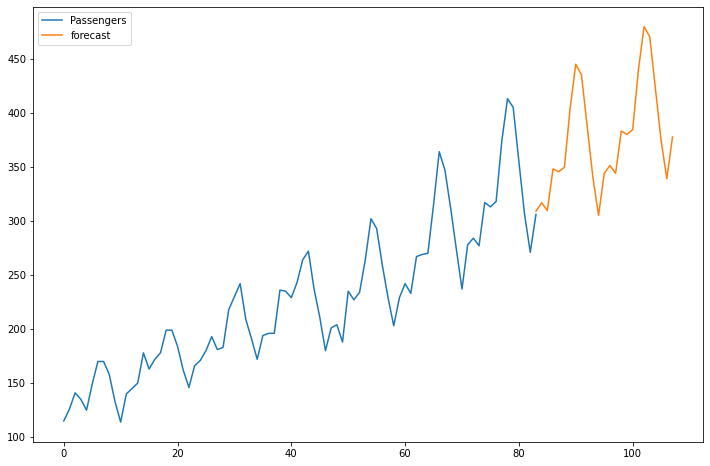

In [103]:
future_data['forecast'] = results.predict(start = 83, end = 128, dynamic= True)  
future_data[['Passengers', 'forecast']].plot(figsize=(12, 8)) 

# 11. ARIMA MODEL:

In [104]:
airlines_data_2 = airlines_data.copy()
airlines_data_2

,Month,Passengers,month,year
0,1995-01-01,112,January,1995
1,1995-02-01,118,February,1995
2,1995-03-01,132,March,1995
3,1995-04-01,129,April,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,August,2002
92,2002-09-01,355,September,2002
93,2002-10-01,306,October,2002
94,2002-11-01,271,November,2002


In [105]:
airlines_data_2.drop(labels=['month','year'],axis=1,inplace=True)
airlines_data_2

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [106]:
airlines_data_2.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [107]:
airlines_data_2.isna().sum()

Month         0
Passengers    0
dtype: int64

### Visualisation:

<AxesSubplot:>

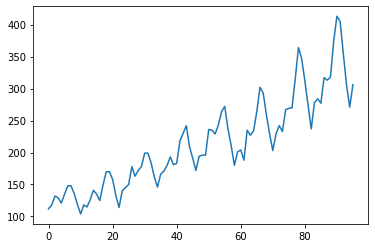

In [108]:
#Data is non stattionary and seasonal
airlines_data_2['Passengers'].plot()

In [109]:
# Testing seasionality by using Dicky fuller test
from statsmodels.tsa.stattools import adfuller

In [110]:
test_result=adfuller(airlines_data_2['Passengers'])
test_result

(1.340247959646704,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [111]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.10:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ") 

In [112]:
adfuller_test(airlines_data_2['Passengers'])

ADF Test Statistic : 1.340247959646704
p-value : 0.9968250481137263
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing :

In [113]:
airlines_data_2['Passengers_First_Difference'] = airlines_data_2['Passengers'] - airlines_data_2['Passengers'].shift(1)
airlines_data_2.head()

,Month,Passengers,Passengers_First_Difference
0,1995-01-01,112,NaN
1,1995-02-01,118,6.0
2,1995-03-01,132,14.0
3,1995-04-01,129,-3.0
4,1995-05-01,121,-8.0


In [114]:
airlines_data_2['Seasonal_First_Difference'] = airlines_data_2['Passengers'] - airlines_data_2['Passengers'].shift(12)
airlines_data_2.head(20)

,Month,Passengers,Passengers_First_Difference,Seasonal_First_Difference
0,1995-01-01,112,NaN,NaN
1,1995-02-01,118,6.0,NaN
2,1995-03-01,132,14.0,NaN
3,1995-04-01,129,-3.0,NaN
4,1995-05-01,121,-8.0,NaN
5,1995-06-01,135,14.0,NaN
6,1995-07-01,148,13.0,NaN
7,1995-08-01,148,0.0,NaN
8,1995-09-01,136,-12.0,NaN
9,1995-10-01,119,-17.0,NaN


In [115]:
airlines_data_2.dropna(inplace=True)

In [116]:
adfuller_test(airlines_data_2['Seasonal_First_Difference'].dropna())

ADF Test Statistic : -2.6900043838623158
p-value : 0.07578397625851772
#Lags Used : 1
Number of Observations Used : 82
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

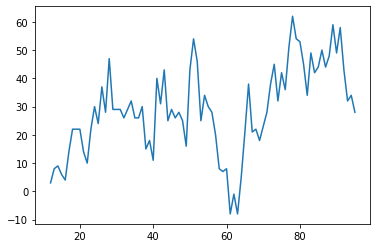

In [117]:
airlines_data_2['Seasonal_First_Difference'].plot()

### ACF and PCF plot

In [118]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

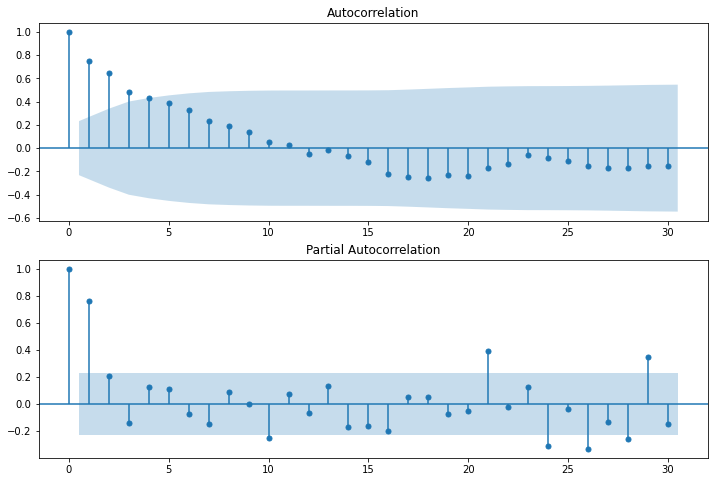

In [119]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(airlines_data_2['Seasonal_First_Difference'].iloc[13:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(airlines_data_2['Seasonal_First_Difference'].iloc[13:],lags=30,ax=ax2)

In [120]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
model=ARIMA(airlines_data_2['Passengers'],order=(1,1,1))
model_fit=model.fit()

In [123]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -377.138
Method:                       css-mle   S.D. of innovations             22.366
Date:                Tue, 21 Dec 2021   AIC                            762.275
Time:                        03:58:36   BIC                            771.951
Sample:                             1   HQIC                           766.162
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4537      2.948      0.832      0.405      -3.325       8.233
ar.L1.D.Passengers    -0.6635      0.087     -7.602      0.000      -0.835      -0.492
ma.L1.D.Passengers     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5072           +0.0000j            1.5072            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

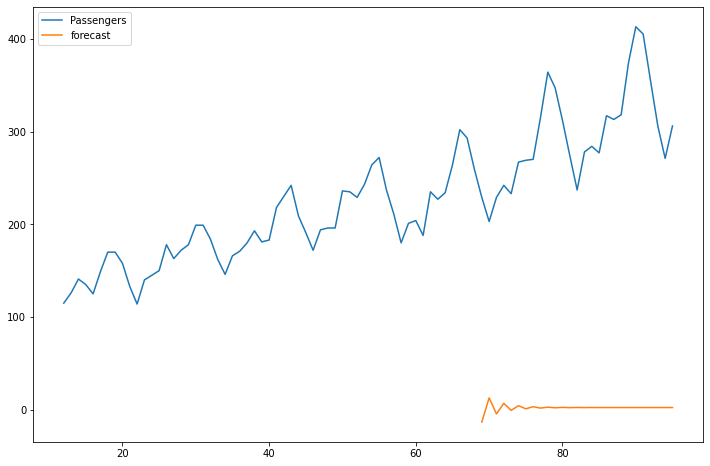

In [124]:
airlines_data_2['forecast']=model_fit.predict(start=70,end=96,dynamic=True)
airlines_data_2[['Passengers','forecast']].plot(figsize=(12,8))

In [125]:
airlines_data_2['forecast']

12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
        ...   
91    2.451780
92    2.454904
93    2.452832
94    2.454207
95    2.453294
Name: forecast, Length: 84, dtype: float64

##### Used for non-seasional data, but here data are seasional hence accuracy is low for ARIMA model

##### For seasonal model, SARIMA model is used

##  -------------------------------------------------------------------------------------------------------------------------

# 12. SARIMA MODEL :

In [126]:
import statsmodels.api as sm

In [127]:
model=sm.tsa.statespace.SARIMAX(airlines_data_2['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [128]:
airlines_data_2.drop('forecast',axis=1,inplace=True)

<AxesSubplot:>

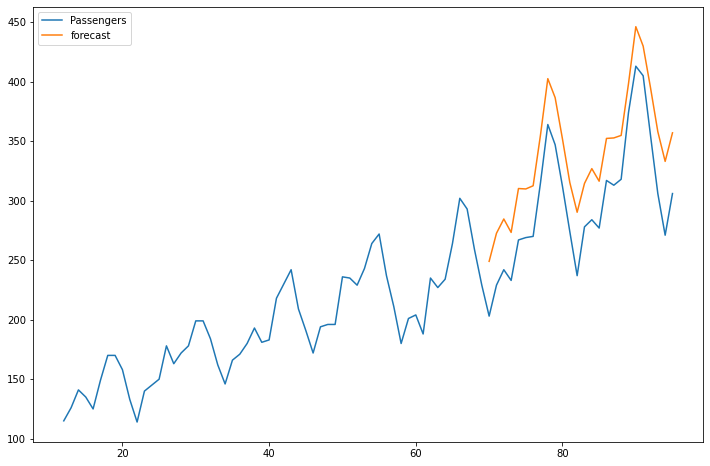

In [129]:
airlines_data_2['forecast']=results.predict(start=70,end=96,dynamic=True)
airlines_data_2[['Passengers','forecast']].plot(figsize=(12,8))

In [130]:
airlines_data_2.drop(labels='forecast',axis=1,inplace=True)

In [131]:
airlines_data_2

,Month,Passengers,Passengers_First_Difference,Seasonal_First_Difference
12,1996-01-01,115,-3.0,3.0
13,1996-02-01,126,11.0,8.0
14,1996-03-01,141,15.0,9.0
15,1996-04-01,135,-6.0,6.0
16,1996-05-01,125,-10.0,4.0
...,...,...,...,...
91,2002-08-01,405,-8.0,58.0
92,2002-09-01,355,-50.0,43.0
93,2002-10-01,306,-49.0,32.0
94,2002-11-01,271,-35.0,34.0


In [132]:
airlines_data_2.set_index('Month',inplace=True)

In [133]:
from pandas.tseries.offsets import DateOffset
future_dates=[airlines_data_2.index[-1]+ DateOffset(months=x)for x in range(0,25)] #predicting for next 24 months

In [134]:
future_dates

[Timestamp('2002-12-01 00:00:00'),
 Timestamp('2003-01-01 00:00:00'),
 Timestamp('2003-02-01 00:00:00'),
 Timestamp('2003-03-01 00:00:00'),
 Timestamp('2003-04-01 00:00:00'),
 Timestamp('2003-05-01 00:00:00'),
 Timestamp('2003-06-01 00:00:00'),
 Timestamp('2003-07-01 00:00:00'),
 Timestamp('2003-08-01 00:00:00'),
 Timestamp('2003-09-01 00:00:00'),
 Timestamp('2003-10-01 00:00:00'),
 Timestamp('2003-11-01 00:00:00'),
 Timestamp('2003-12-01 00:00:00'),
 Timestamp('2004-01-01 00:00:00'),
 Timestamp('2004-02-01 00:00:00'),
 Timestamp('2004-03-01 00:00:00'),
 Timestamp('2004-04-01 00:00:00'),
 Timestamp('2004-05-01 00:00:00'),
 Timestamp('2004-06-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2004-08-01 00:00:00'),
 Timestamp('2004-09-01 00:00:00'),
 Timestamp('2004-10-01 00:00:00'),
 Timestamp('2004-11-01 00:00:00'),
 Timestamp('2004-12-01 00:00:00')]

In [135]:
future_date_set=pd.DataFrame(index=future_dates[1:],columns=airlines_data_2.columns)
future_date_set

,Passengers,Passengers_First_Difference,Seasonal_First_Difference
2003-01-01,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN
2003-06-01,NaN,NaN,NaN
2003-07-01,NaN,NaN,NaN
2003-08-01,NaN,NaN,NaN
2003-09-01,NaN,NaN,NaN
2003-10-01,NaN,NaN,NaN


In [136]:
airlines_data_2

,Passengers,Passengers_First_Difference,Seasonal_First_Difference
Month,,,
1996-01-01,115,-3.0,3.0
1996-02-01,126,11.0,8.0
1996-03-01,141,15.0,9.0
1996-04-01,135,-6.0,6.0
1996-05-01,125,-10.0,4.0
...,...,...,...
2002-08-01,405,-8.0,58.0
2002-09-01,355,-50.0,43.0
2002-10-01,306,-49.0,32.0


In [137]:
future_data=pd.concat([airlines_data_2,future_date_set])
future_data

,Passengers,Passengers_First_Difference,Seasonal_First_Difference
1996-01-01,115,-3.0,3.0
1996-02-01,126,11.0,8.0
1996-03-01,141,15.0,9.0
1996-04-01,135,-6.0,6.0
1996-05-01,125,-10.0,4.0
...,...,...,...
2004-08-01,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN


In [138]:
future_data['forecast'] =np.NaN
future_data

,Passengers,Passengers_First_Difference,Seasonal_First_Difference,forecast
1996-01-01,115,-3.0,3.0,NaN
1996-02-01,126,11.0,8.0,NaN
1996-03-01,141,15.0,9.0,NaN
1996-04-01,135,-6.0,6.0,NaN
1996-05-01,125,-10.0,4.0,NaN
...,...,...,...,...
2004-08-01,NaN,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN,NaN


In [139]:
future_data.iloc[83:]

,Passengers,Passengers_First_Difference,Seasonal_First_Difference,forecast
2002-12-01,306,35.0,28.0,NaN
2003-01-01,NaN,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN,NaN
2003-06-01,NaN,NaN,NaN,NaN
2003-07-01,NaN,NaN,NaN,NaN
2003-08-01,NaN,NaN,NaN,NaN
2003-09-01,NaN,NaN,NaN,NaN


In [140]:
future_data.reset_index(inplace=True)

In [141]:
future_data

,index,Passengers,Passengers_First_Difference,Seasonal_First_Difference,forecast
0,1996-01-01,115,-3.0,3.0,NaN
1,1996-02-01,126,11.0,8.0,NaN
2,1996-03-01,141,15.0,9.0,NaN
3,1996-04-01,135,-6.0,6.0,NaN
4,1996-05-01,125,-10.0,4.0,NaN
...,...,...,...,...,...
103,2004-08-01,NaN,NaN,NaN,NaN
104,2004-09-01,NaN,NaN,NaN,NaN
105,2004-10-01,NaN,NaN,NaN,NaN
106,2004-11-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

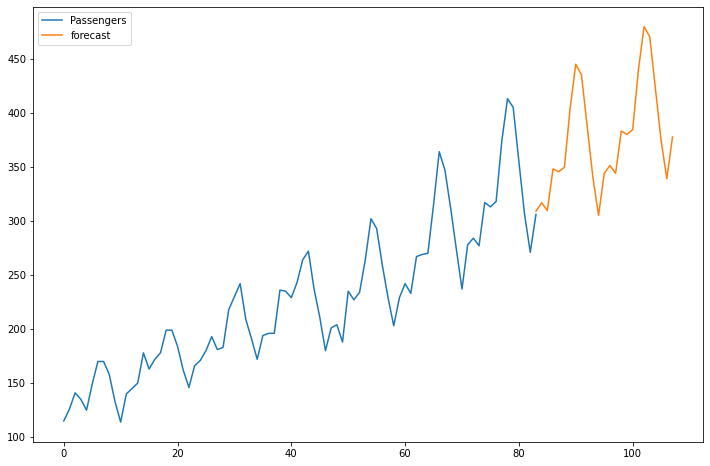

In [142]:
future_data['forecast'] = results.predict(start = 83, end = 128, dynamic= True)  
future_data[['Passengers', 'forecast']].plot(figsize=(12, 8)) 

## ---------------------------------------------------------------------------------------------------------------------------

# 11. ARIMA MODEL:

In [143]:
airlines_data_2 = airlines_data.copy()
airlines_data_2

,Month,Passengers,month,year
0,1995-01-01,112,January,1995
1,1995-02-01,118,February,1995
2,1995-03-01,132,March,1995
3,1995-04-01,129,April,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,August,2002
92,2002-09-01,355,September,2002
93,2002-10-01,306,October,2002
94,2002-11-01,271,November,2002


In [144]:
airlines_data_2.drop(labels=['month','year'],axis=1,inplace=True)
airlines_data_2

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [145]:
airlines_data_2.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [146]:
airlines_data_2.isna().sum()

Month         0
Passengers    0
dtype: int64

### Visualisation:

<AxesSubplot:>

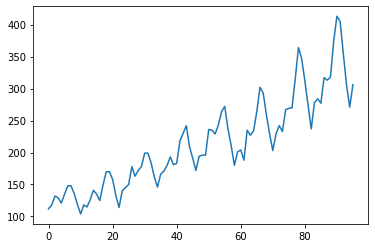

In [147]:
#Data is non stattionary and seasonal
airlines_data_2['Passengers'].plot()

In [148]:
# Testing seasionality by using Dicky fuller test
from statsmodels.tsa.stattools import adfuller

In [149]:
test_result=adfuller(airlines_data_2['Passengers'])
test_result

(1.340247959646704,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [150]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.10:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ") 

In [151]:
adfuller_test(airlines_data_2['Passengers'])

ADF Test Statistic : 1.340247959646704
p-value : 0.9968250481137263
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing :

In [152]:
airlines_data_2['Passengers_First_Difference'] = airlines_data_2['Passengers'] - airlines_data_2['Passengers'].shift(1)
airlines_data_2.head()

,Month,Passengers,Passengers_First_Difference
0,1995-01-01,112,NaN
1,1995-02-01,118,6.0
2,1995-03-01,132,14.0
3,1995-04-01,129,-3.0
4,1995-05-01,121,-8.0


In [153]:
airlines_data_2['Seasonal_First_Difference'] = airlines_data_2['Passengers'] - airlines_data_2['Passengers'].shift(12)
airlines_data_2.head(20)

,Month,Passengers,Passengers_First_Difference,Seasonal_First_Difference
0,1995-01-01,112,NaN,NaN
1,1995-02-01,118,6.0,NaN
2,1995-03-01,132,14.0,NaN
3,1995-04-01,129,-3.0,NaN
4,1995-05-01,121,-8.0,NaN
5,1995-06-01,135,14.0,NaN
6,1995-07-01,148,13.0,NaN
7,1995-08-01,148,0.0,NaN
8,1995-09-01,136,-12.0,NaN
9,1995-10-01,119,-17.0,NaN


In [154]:
airlines_data_2.dropna(inplace=True)

In [155]:
adfuller_test(airlines_data_2['Seasonal_First_Difference'].dropna())

ADF Test Statistic : -2.6900043838623158
p-value : 0.07578397625851772
#Lags Used : 1
Number of Observations Used : 82
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

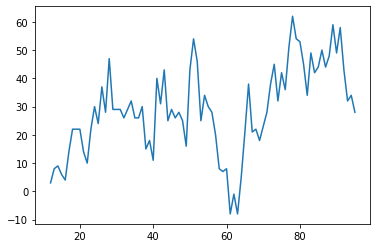

In [156]:
airlines_data_2['Seasonal_First_Difference'].plot()

### ACF and PCF plot

In [157]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

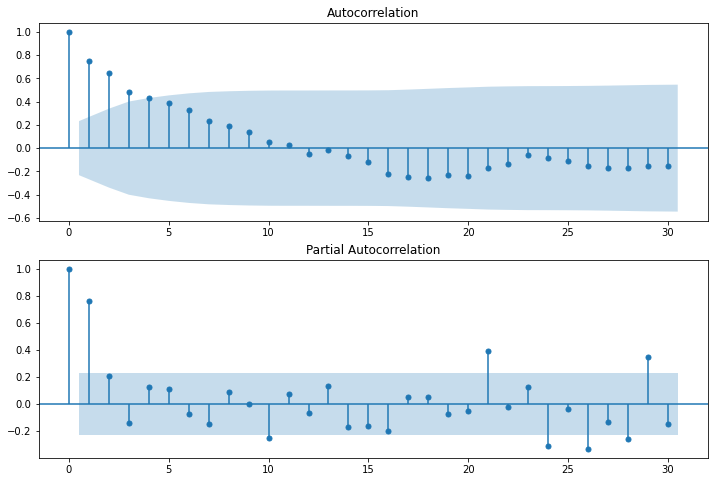

In [158]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(airlines_data_2['Seasonal_First_Difference'].iloc[13:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(airlines_data_2['Seasonal_First_Difference'].iloc[13:],lags=30,ax=ax2)

In [159]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [160]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
model=ARIMA(airlines_data_2['Passengers'],order=(1,1,1))
model_fit=model.fit()

In [162]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -377.138
Method:                       css-mle   S.D. of innovations             22.366
Date:                Tue, 21 Dec 2021   AIC                            762.275
Time:                        03:58:44   BIC                            771.951
Sample:                             1   HQIC                           766.162
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.4537      2.948      0.832      0.405      -3.325       8.233
ar.L1.D.Passengers    -0.6635      0.087     -7.602      0.000      -0.835      -0.492
ma.L1.D.Passengers     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5072           +0.0000j            1.5072            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

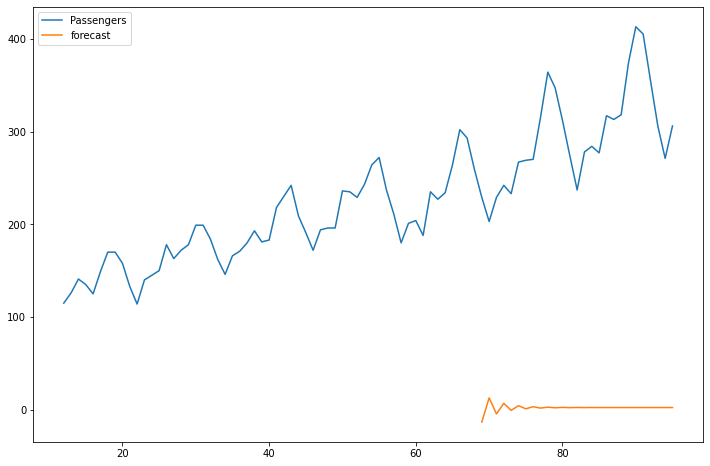

In [163]:
airlines_data_2['forecast']=model_fit.predict(start=70,end=96,dynamic=True)
airlines_data_2[['Passengers','forecast']].plot(figsize=(12,8))

In [164]:
airlines_data_2['forecast']

12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
        ...   
91    2.451780
92    2.454904
93    2.452832
94    2.454207
95    2.453294
Name: forecast, Length: 84, dtype: float64

##### Used for non-seasional data, but here data are seasional hence accuracy is low for ARIMA model

##### For seasonal model, SARIMA model is used

##  -------------------------------------------------------------------------------------------------------------------------

# 12. SARIMA MODEL :

In [165]:
import statsmodels.api as sm

In [166]:
model=sm.tsa.statespace.SARIMAX(airlines_data_2['Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [167]:
airlines_data_2.drop('forecast',axis=1,inplace=True)

<AxesSubplot:>

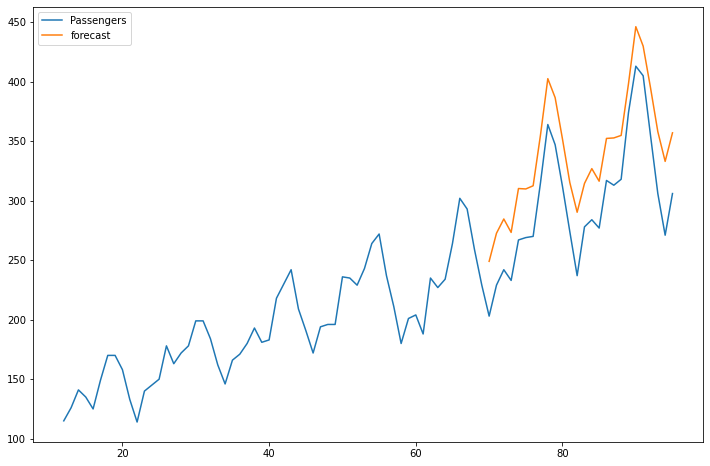

In [168]:
airlines_data_2['forecast']=results.predict(start=70,end=96,dynamic=True)
airlines_data_2[['Passengers','forecast']].plot(figsize=(12,8))

In [169]:
airlines_data_2.drop(labels='forecast',axis=1,inplace=True)

In [170]:
airlines_data_2

,Month,Passengers,Passengers_First_Difference,Seasonal_First_Difference
12,1996-01-01,115,-3.0,3.0
13,1996-02-01,126,11.0,8.0
14,1996-03-01,141,15.0,9.0
15,1996-04-01,135,-6.0,6.0
16,1996-05-01,125,-10.0,4.0
...,...,...,...,...
91,2002-08-01,405,-8.0,58.0
92,2002-09-01,355,-50.0,43.0
93,2002-10-01,306,-49.0,32.0
94,2002-11-01,271,-35.0,34.0


In [171]:
airlines_data_2.set_index('Month',inplace=True)

In [172]:
from pandas.tseries.offsets import DateOffset
future_dates=[airlines_data_2.index[-1]+ DateOffset(months=x)for x in range(0,25)] #predicting for next 24 months

In [173]:
future_dates

[Timestamp('2002-12-01 00:00:00'),
 Timestamp('2003-01-01 00:00:00'),
 Timestamp('2003-02-01 00:00:00'),
 Timestamp('2003-03-01 00:00:00'),
 Timestamp('2003-04-01 00:00:00'),
 Timestamp('2003-05-01 00:00:00'),
 Timestamp('2003-06-01 00:00:00'),
 Timestamp('2003-07-01 00:00:00'),
 Timestamp('2003-08-01 00:00:00'),
 Timestamp('2003-09-01 00:00:00'),
 Timestamp('2003-10-01 00:00:00'),
 Timestamp('2003-11-01 00:00:00'),
 Timestamp('2003-12-01 00:00:00'),
 Timestamp('2004-01-01 00:00:00'),
 Timestamp('2004-02-01 00:00:00'),
 Timestamp('2004-03-01 00:00:00'),
 Timestamp('2004-04-01 00:00:00'),
 Timestamp('2004-05-01 00:00:00'),
 Timestamp('2004-06-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2004-08-01 00:00:00'),
 Timestamp('2004-09-01 00:00:00'),
 Timestamp('2004-10-01 00:00:00'),
 Timestamp('2004-11-01 00:00:00'),
 Timestamp('2004-12-01 00:00:00')]

In [174]:
future_date_set=pd.DataFrame(index=future_dates[1:],columns=airlines_data_2.columns)
future_date_set

,Passengers,Passengers_First_Difference,Seasonal_First_Difference
2003-01-01,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN
2003-06-01,NaN,NaN,NaN
2003-07-01,NaN,NaN,NaN
2003-08-01,NaN,NaN,NaN
2003-09-01,NaN,NaN,NaN
2003-10-01,NaN,NaN,NaN


In [175]:
airlines_data_2

,Passengers,Passengers_First_Difference,Seasonal_First_Difference
Month,,,
1996-01-01,115,-3.0,3.0
1996-02-01,126,11.0,8.0
1996-03-01,141,15.0,9.0
1996-04-01,135,-6.0,6.0
1996-05-01,125,-10.0,4.0
...,...,...,...
2002-08-01,405,-8.0,58.0
2002-09-01,355,-50.0,43.0
2002-10-01,306,-49.0,32.0


In [176]:
future_data=pd.concat([airlines_data_2,future_date_set])
future_data

,Passengers,Passengers_First_Difference,Seasonal_First_Difference
1996-01-01,115,-3.0,3.0
1996-02-01,126,11.0,8.0
1996-03-01,141,15.0,9.0
1996-04-01,135,-6.0,6.0
1996-05-01,125,-10.0,4.0
...,...,...,...
2004-08-01,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN


In [177]:
future_data['forecast'] =np.NaN
future_data

,Passengers,Passengers_First_Difference,Seasonal_First_Difference,forecast
1996-01-01,115,-3.0,3.0,NaN
1996-02-01,126,11.0,8.0,NaN
1996-03-01,141,15.0,9.0,NaN
1996-04-01,135,-6.0,6.0,NaN
1996-05-01,125,-10.0,4.0,NaN
...,...,...,...,...
2004-08-01,NaN,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN,NaN


In [178]:
future_data.iloc[83:]

,Passengers,Passengers_First_Difference,Seasonal_First_Difference,forecast
2002-12-01,306,35.0,28.0,NaN
2003-01-01,NaN,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN,NaN
2003-06-01,NaN,NaN,NaN,NaN
2003-07-01,NaN,NaN,NaN,NaN
2003-08-01,NaN,NaN,NaN,NaN
2003-09-01,NaN,NaN,NaN,NaN


In [179]:
future_data.reset_index(inplace=True)

In [180]:
future_data

,index,Passengers,Passengers_First_Difference,Seasonal_First_Difference,forecast
0,1996-01-01,115,-3.0,3.0,NaN
1,1996-02-01,126,11.0,8.0,NaN
2,1996-03-01,141,15.0,9.0,NaN
3,1996-04-01,135,-6.0,6.0,NaN
4,1996-05-01,125,-10.0,4.0,NaN
...,...,...,...,...,...
103,2004-08-01,NaN,NaN,NaN,NaN
104,2004-09-01,NaN,NaN,NaN,NaN
105,2004-10-01,NaN,NaN,NaN,NaN
106,2004-11-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

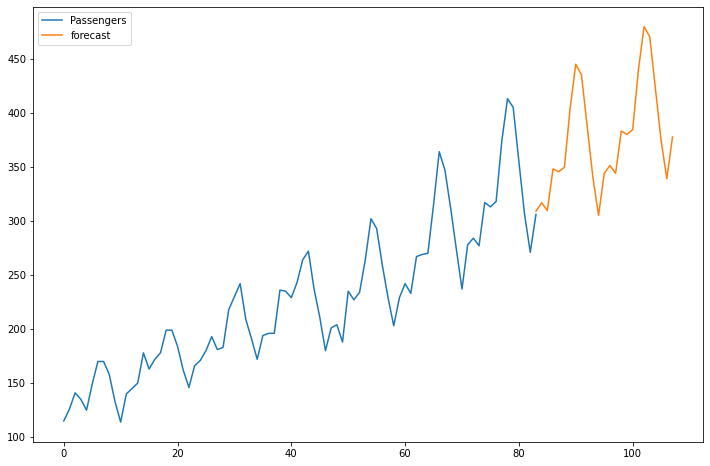

In [181]:
future_data['forecast'] = results.predict(start = 83, end = 128, dynamic= True)  
future_data[['Passengers', 'forecast']].plot(figsize=(12, 8)) 